<a href="https://colab.research.google.com/github/vconessa/Mercado-financeiro/blob/main/A%C3%A7%C3%B5es_energia_(IBOV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ações de do setor de energia que compõe  IBOV 
# Entendimento e análise das ações e seus pesos no IBOV
 

IBOV 


1. Criado em 1968
2. Reavaliado a cada 4 meses 
3. Composto por ações (Ações PN - dividendos ou ON - votação) e units (Pacote que contem PN e ON)
4. Critérios são: Índice de negociabilidade IN (liquidez), presença de 95% dos pregões no ano e mínimo de 0,1% do volume financeiro do mercado a vista

https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.htm

Obtenção dos dados. -
Realizado download do arquivo em csv do índice IBOV através do site da B3 em 31/10/2022 

In [54]:
# Instalando bibliotecas

! pip install yfinance
! pip install plotly
! pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
# Bibliotecas 

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime
import mplfinance as mpf
from plotly.subplots import make_subplots


In [56]:
ibov = pd.read_csv("/content/IBOVDia_31-10-22 (2).csv", encoding="ISO-8859-1", sep=";")
ibov.head()
# Modifiquei o arquivo csv, apenas tirando o cabeçalho e corrigi o erro de "Error tokenizing data"

,Setor,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.
0,Bens Indls / Máqs e Equips,WEGE3,WEG,ON NM,1.481.593.024,"2,64","2,64"
1,Bens Indls / Mat Transporte,EMBR3,EMBRAER,ON NM,734.632.205,"0,447","0,447"
2,Bens Indls/Transporte,AZUL4,AZUL,PN N2,327.646.296,"0,225","2,244"
3,Bens Indls/Transporte,CCRO3,CCR SA,ON NM,1.115.681.435,"0,663","2,244"
4,Bens Indls/Transporte,ECOR3,ECORODOVIAS,ON NM,333.657.615,"0,082","2,244"


In [57]:
ibov.isnull().sum()

Setor             0
Código            2
Ação              2
Tipo              2
Qtde. Teórica     0
Part. (%)         1
Part. (%)Acum.    1
dtype: int64

In [58]:
# Em reunião eu escolhi ficar com as empresa do setor de energia, vou realizar o filtro 
ibov['Setor'].value_counts()

Utilidade Públ / Energ Elétrica                      11
Financ e Outros / Interms Financs                     8
Consumo Cíclico / Comércio                            7
Petróleo/ Gás e Biocombustíveis                       7
Bens Indls/Transporte                                 5
Cons N  Básico / Alimentos Processados                5
Saúde/SM Hosp An.Diag                                 4
Mats Básicos / Sid Metalurgia                         4
Cons N Cíclico / Comércio Distr.                      3
Tec.Informação/Programas Servs                        3
Diversos                                              3
Financ e Outros / Explor Imóveis                      3
Financ e Outros / Previd  Seguros                     3
Mats Básicos / Madeira e Papel                        3
Mats Básicos / Mineração                              3
Consumo Cíclico/Constr Civil                          3
Cons N Ciclico/Agropecuária                           2
Telecomunicação                                 

In [59]:
acoes_energia = ibov.groupby(['Setor']).get_group('Utilidade Públ / Energ Elétrica')
acoes_energia.head()

,Setor,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.
81,Utilidade Públ / Energ Elétrica,CMIG4,CEMIG,PN N1,1.442.098.974,"0,758","9,596"
82,Utilidade Públ / Energ Elétrica,CPLE6,COPEL,PNB N2,1.563.365.506,"0,529","9,596"
83,Utilidade Públ / Energ Elétrica,CPFE3,CPFL ENERGIA,ON NM,187.732.538,"0,3","9,596"
84,Utilidade Públ / Energ Elétrica,ELET3,ELETROBRAS,ON N1,1.447.696.333,"3,247","9,596"
85,Utilidade Públ / Energ Elétrica,ELET6,ELETROBRAS,PNB N1,279.941.393,"0,663","9,596"


In [60]:
acoes_energia.isnull().sum()

Setor             0
Código            0
Ação              0
Tipo              0
Qtde. Teórica     0
Part. (%)         0
Part. (%)Acum.    0
dtype: int64

In [61]:
# Interpretando o df, entendi que o setor de "Utilidade Públ / Energ Elétrica" representa 9,596% do IBOV representado por 11 ações

In [62]:
acoes_energia.sort_values('Part. (%)',ascending=False, ignore_index=True, inplace=True)
acoes_energia

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Setor,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.
0,Utilidade Públ / Energ Elétrica,ELET3,ELETROBRAS,ON N1,1.447.696.333,"3,247","9,596"
1,Utilidade Públ / Energ Elétrica,EQTL3,EQUATORIAL,ON NM,1.100.513.485,"1,457","9,596"
2,Utilidade Públ / Energ Elétrica,ENEV3,ENEVA,ON NM,1.561.135.009,"0,986","9,596"
3,Utilidade Públ / Energ Elétrica,CMIG4,CEMIG,PN N1,1.442.098.974,"0,758","9,596"
4,Utilidade Públ / Energ Elétrica,ELET6,ELETROBRAS,PNB N1,279.941.393,"0,663","9,596"
5,Utilidade Públ / Energ Elétrica,ENGI11,ENERGISA,UNT N2,248.477.689,"0,535","9,596"
6,Utilidade Públ / Energ Elétrica,CPLE6,COPEL,PNB N2,1.563.365.506,"0,529","9,596"
7,Utilidade Públ / Energ Elétrica,EGIE3,ENGIE BRASIL,ON NM,255.208.461,"0,464","9,596"
8,Utilidade Públ / Energ Elétrica,TAEE11,TAESA,UNT N2,218.568.234,"0,4","9,596"
9,Utilidade Públ / Energ Elétrica,CPFE3,CPFL ENERGIA,ON NM,187.732.538,"0,3","9,596"


In [63]:
# Para utilziar a biblioteca yfinance é preciso adiconar .SA ao final dos tickers 

tickers = acoes_energia['Código']
list(tickers)

['ELET3',
 'EQTL3',
 'ENEV3',
 'CMIG4',
 'ELET6',
 'ENGI11',
 'CPLE6',
 'EGIE3',
 'TAEE11',
 'CPFE3',
 'ENBR3']

In [64]:
tickers_yf = []
for i in range (0,len(tickers)):
  tickers_yf.append(tickers[i]+'.SA')
tickers_yf

['ELET3.SA',
 'EQTL3.SA',
 'ENEV3.SA',
 'CMIG4.SA',
 'ELET6.SA',
 'ENGI11.SA',
 'CPLE6.SA',
 'EGIE3.SA',
 'TAEE11.SA',
 'CPFE3.SA',
 'ENBR3.SA']

In [65]:
# Utilzando a biblioteca yfiannce vamos coletar informações de preço dos ativos para criar df único

In [66]:
df = yf.download(tickers_yf, start='2022-01-01', end='2022-10-31')
df.head()

[*********************100%***********************]  11 of 11 completed


Adj Close                                                        \
            CMIG4.SA   CPFE3.SA  CPLE6.SA   EGIE3.SA   ELET3.SA   ELET6.SA   
Date                                                                         
2022-01-03  8.705404  23.558830  5.982065  36.109875  32.000744  31.015554   
2022-01-04  8.698646  23.486006  5.916942  36.204800  31.314243  30.141743   
2022-01-05  8.421533  23.112780  5.842515  35.692196  31.186749  29.988106   
2022-01-06  8.239043  22.566593  5.693661  35.407421  31.137714  29.959299   
2022-01-07  8.286356  23.067265  5.675054  35.454884  29.774521  28.960655   

                                                      ...   Volume            \
             ENBR3.SA ENEV3.SA  ENGI11.SA   EQTL3.SA  ... CPFE3.SA  CPLE6.SA   
Date                                                  ...                      
2022-01-03  18.788378    13.44  39.370804  21.519110  ...  3036200  23758600   
2022-01-04  18.770258    12.91  38.893169  21.324104  ...  2895500  10977800   
2022-01-05  18.665941    12.40  38.805443  21.041342  ...  3249800  10475900   
2022-01-06  18.496422    12.21  38.435028  20.865835  ...  3452500  13934400   
2022-01-07  18.581181    11.93  38.493515  20.817083  ...  2267200  10938400   

                                                                            \
           EGIE3.SA ELET3.SA ELET6.SA ENBR3.SA ENEV3.SA ENGI11.SA EQTL3.SA   
Date                                                                         
2022-01-03  1133700  3669800  1776200  3482100  9850100   2360300  6342700   
2022-01-04  1209200  3821000  1704700  4853100  8749600   1031800  5206000   
2022-01-05  1027600  6998900  1841000  4238800  7407500   1692100  8492900   
2022-01-06  1000600  4234800  1555700  2793400  7208700   1572500  4421900   
2022-01-07  1234100  8964000  2466800  3900100  6834500    950400  4463700   

                      
           TAEE11.SA  
Date                  
2022-01-03   3007200  
2022-01-04   2351300  
2022-01-05   1375000  
2022-01-06   2044500  
2022-01-07   1703700  

[5 rows x 66 columns]

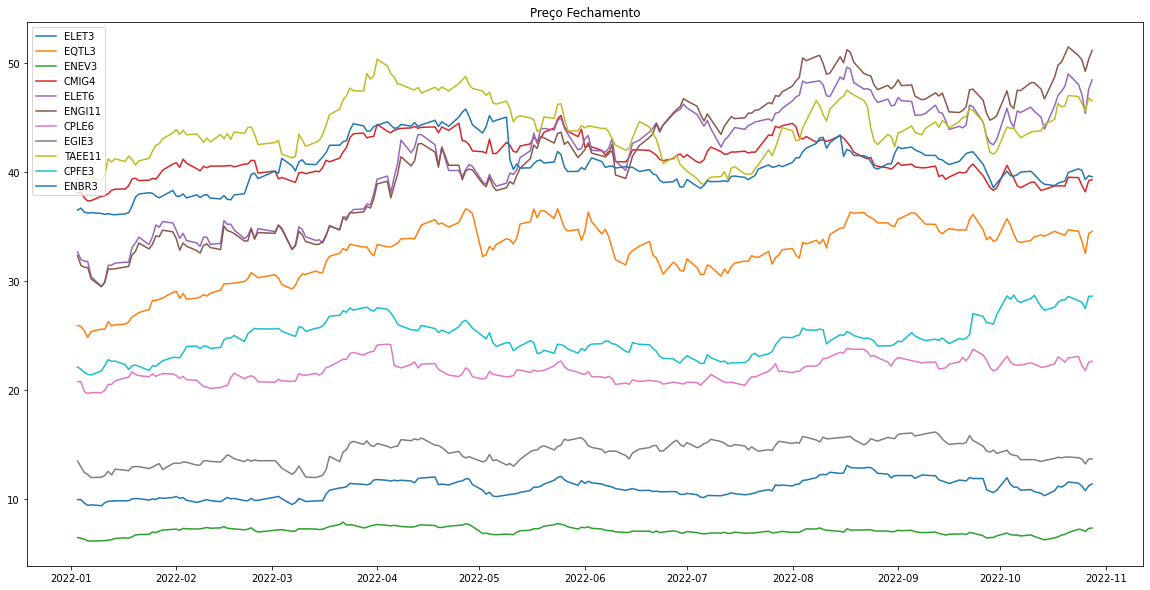

In [67]:
# Melhorar a qualidade do gráfico - Organizar legenda e cores das linha na sequência 
plt.figure(figsize=(20,10))
plt.title('Preço Fechamento')
plt.plot(df['Close'])
plt.legend(tickers)
plt.show( )

In [68]:
df['Close'].describe()

,CMIG4.SA,CPFE3.SA,CPLE6.SA,EGIE3.SA,ELET3.SA,ELET6.SA,ENBR3.SA,ENEV3.SA,ENGI11.SA,EQTL3.SA,TAEE11.SA
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,10.925935,32.489952,7.016971,41.203702,41.130529,41.538221,21.734808,14.261635,43.947644,24.730529,40.522740
std,0.856273,2.852713,0.356803,1.818448,5.268008,6.110695,0.975353,1.043016,2.539139,1.763558,2.266645
min,9.346153,24.790001,6.100000,37.299999,29.480000,29.440001,19.639999,11.930000,38.820000,21.350000,36.049999
25%,10.195000,30.715000,6.820000,39.889999,35.395000,35.000000,21.007500,13.470000,42.405001,23.462500,39.090000
50%,10.835000,33.125000,7.020000,41.135000,42.889999,42.469999,21.665000,14.425000,43.745001,24.505000,40.400002
75%,11.616538,34.647499,7.252500,42.712500,45.347500,46.685000,22.457500,15.132500,45.837500,25.645000,41.755000
max,13.050000,36.599998,7.840000,45.169998,49.599998,51.450001,24.170000,16.110001,50.320000,28.680000,45.750000


# Observando os dados entendi que quanto maior o desvio padrão do preço de uma ação, maior sua oscilação. Levando em consideração de que "fazer" dinheiro no mercado está em entender os movimentos, podemos levantar a hipotese de que ações com maior desvio padrão são melhores para curto/médio prazo e ações com desvio padrão menor são melhores para médio/longo prazo ? Como achar esse parâmetro ? 

In [69]:
# Gráfico com menor desvio padrão
close = df['Close']
ticker = str(input('Ticker: '))
px.histogram(close, x=ticker, nbins=50)

Ticker: CPLE6.SA


# Estudar distribuição normal e a assimetria das curvas (função skew e scipy)

In [70]:
# Gráfico com maior desvio padrão
close = df['Close']
ticker = str(input('Ticker: '))
px.histogram(close, x=ticker, nbins=50)

Ticker: ELET6.SA


Com desvio padrão maior o gráfico tende a uma simetria normal

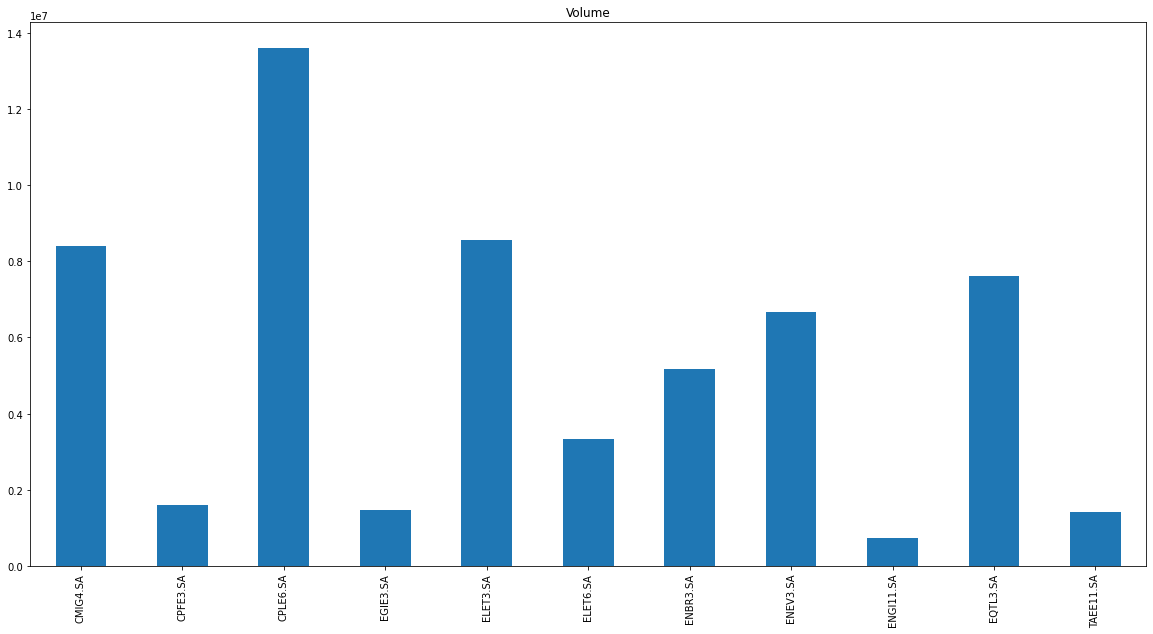

In [71]:
plt.figure(figsize=(20,10))
plt.title('Volume')
df['Volume'].iloc[5].plot(kind="bar")


In [72]:
for i in range (0,len(tickers_yf)):
  print(i, tickers_yf[i])

0 ELET3.SA
1 EQTL3.SA
2 ENEV3.SA
3 CMIG4.SA
4 ELET6.SA
5 ENGI11.SA
6 CPLE6.SA
7 EGIE3.SA
8 TAEE11.SA
9 CPFE3.SA
10 ENBR3.SA


In [73]:
# Download da açao escolhida utilizar o código correspondete da ação 
acao = yf.download(tickers_yf[4], start='2022-01-01', end='2022-11-08')

acao.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,33.119999,33.689999,32.110001,32.299999,31.015554,1776200
2022-01-04,32.660000,32.669998,31.120001,31.389999,30.141743,1704700
2022-01-05,30.969999,31.549999,30.770000,31.230000,29.988106,1841000
2022-01-06,31.440001,31.620001,30.969999,31.200001,29.959299,1555700
2022-01-07,31.100000,31.330000,30.010000,30.160000,28.960655,2466800


In [74]:

# Criando o indicador média movel e adicionando no dataframe
acao['MMS20'] = acao['Close'].rolling(window=20).mean()
acao.head()

,Open,High,Low,Close,Adj Close,Volume,MMS20
Date,,,,,,,
2022-01-03,33.119999,33.689999,32.110001,32.299999,31.015554,1776200,NaN
2022-01-04,32.660000,32.669998,31.120001,31.389999,30.141743,1704700,NaN
2022-01-05,30.969999,31.549999,30.770000,31.230000,29.988106,1841000,NaN
2022-01-06,31.440001,31.620001,30.969999,31.200001,29.959299,1555700,NaN
2022-01-07,31.100000,31.330000,30.010000,30.160000,28.960655,2466800,NaN


In [75]:
# Criando os calculos do OBV 
OBV = []
OBV.append(acao['Volume'][0])

for i in range (1, len(acao)):
  if acao['Close'][i] > acao['Close'][i-1]:
    OBV.append(acao['Volume'][-1] + acao['Volume'][i])    
  elif acao['Close'][i] < acao['Close'][i-1]:
    OBV.append(OBV[-1] - acao['Volume'][i])
  else:
    OBV.append(OBV[-1])

In [76]:
acao['OBV'] = OBV
acao

,Open,High,Low,Close,Adj Close,Volume,MMS20,OBV
Date,,,,,,,,
2022-01-03,33.119999,33.689999,32.110001,32.299999,31.015554,1776200,NaN,1776200
2022-01-04,32.660000,32.669998,31.120001,31.389999,30.141743,1704700,NaN,71500
2022-01-05,30.969999,31.549999,30.770000,31.230000,29.988106,1841000,NaN,-1769500
2022-01-06,31.440001,31.620001,30.969999,31.200001,29.959299,1555700,NaN,-3325200
2022-01-07,31.100000,31.330000,30.010000,30.160000,28.960655,2466800,NaN,-5792000
...,...,...,...,...,...,...,...,...
2022-10-31,50.000000,53.799999,50.000000,53.320000,53.320000,8153400,49.0205,10561500
2022-11-01,53.540001,54.380001,52.270000,53.669998,53.669998,5985600,49.3330,8393700
2022-11-03,52.980000,54.910000,52.480000,54.580002,54.580002,3742300,49.7570,6150400


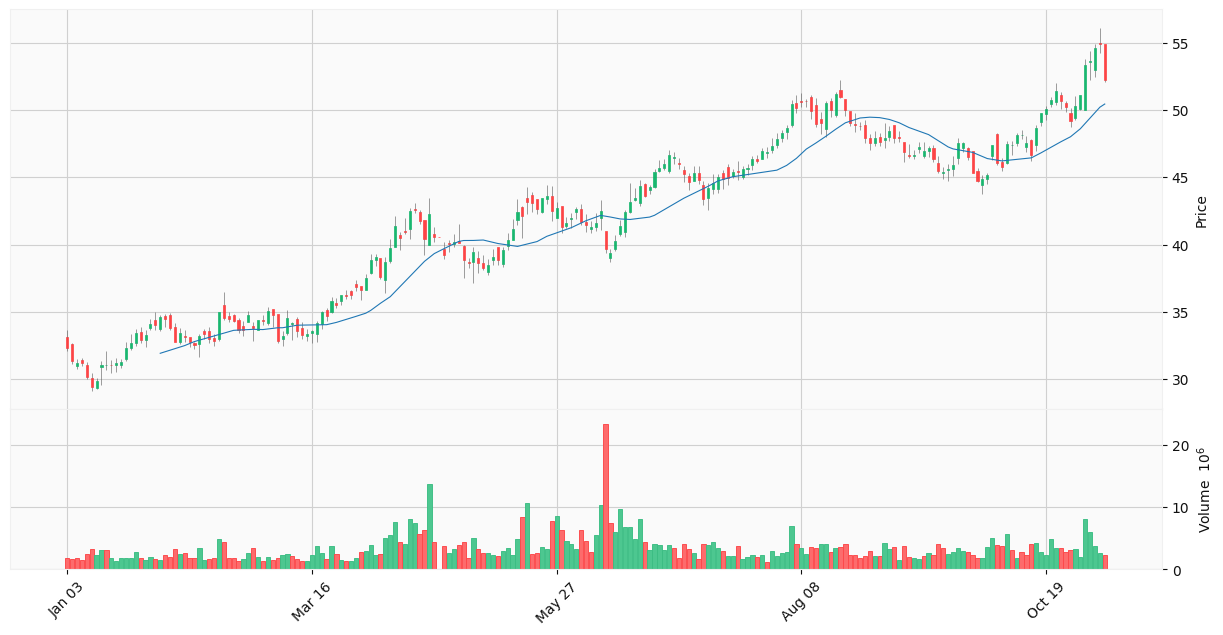

In [83]:
mpf.plot(acao, type = 'candle', figsize=(16,8), volume=True, mav=(20), style='yahoo')

In [117]:
from statsmodels.iolib.table import Row
# Grafico interativo

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[1,0.3])

fig.add_trace(go.Candlestick(
    x = acao.index,
    open = acao['Open'],
    high = acao['High'],
    low = acao['Low'],
    close = acao['Close'],
    name = 'Candle'
))

fig.add_trace(go.Scatter(
    x = acao.index,
    y = acao['MMS20'],
    marker_color = 'green',
    name = 'MMMS 20'
))

fig.add_trace(go.Bar(
    x = acao.index,
    y = acao['Volume'],
    name = 'Volume'
),row=2, col=1)

fig.update_layout(xaxis_rangeslider_visible=False, title = 'GRÁFICO', yaxis_title='NOME AÇÃO',height=900, width=1200)
fig.show()